In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics as skm
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
loan_data = pd.read_csv('loan_data_set (3).csv')
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
loan_data.shape

(614, 13)

In [6]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
non_numeric = loan_data[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']]
non_numeric

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [9]:
numeric_data = loan_data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]
numeric_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [10]:
non_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Loan_ID        614 non-null    object
 1   Gender         601 non-null    object
 2   Married        611 non-null    object
 3   Dependents     599 non-null    object
 4   Education      614 non-null    object
 5   Self_Employed  582 non-null    object
 6   Property_Area  614 non-null    object
 7   Loan_Status    614 non-null    object
dtypes: object(8)
memory usage: 38.5+ KB


In [11]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    int64  
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         592 non-null    float64
 3   Loan_Amount_Term   600 non-null    float64
 4   Credit_History     564 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 24.1 KB


In [12]:
non_numeric.groupby('Loan_Status')['Loan_ID'].count()

Loan_Status
N    192
Y    422
Name: Loan_ID, dtype: int64

In [13]:
non_numeric.isnull().sum()

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [14]:
temp1 = non_numeric.groupby('Gender')['Loan_ID'].count().idxmax()
temp2 = non_numeric.groupby('Married')['Loan_ID'].count().idxmax()
temp3 = non_numeric.groupby('Dependents')['Loan_ID'].count().idxmax()
temp4 = non_numeric.groupby('Self_Employed')['Loan_ID'].count().idxmax()

In [15]:
non_numeric['Gender'] = non_numeric['Gender'].fillna(temp1)
non_numeric['Married'] = non_numeric['Married'].fillna(temp2)
non_numeric['Dependents'] = non_numeric['Dependents'].fillna(temp3)
non_numeric['Self_Employed'] = non_numeric['Self_Employed'].fillna(temp4)

C:\Users\Pratik\AppData\Local\Temp\ipykernel_4104\1514435503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_numeric['Gender'] = non_numeric['Gender'].fillna(temp1)
C:\Users\Pratik\AppData\Local\Temp\ipykernel_4104\1514435503.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_numeric['Married'] = non_numeric['Married'].fillna(temp2)
C:\Users\Pratik\AppData\Local\Temp\ipykernel_4104\1514435503.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [16]:
non_numeric.isnull().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [17]:
numeric_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [18]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    int64  
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         592 non-null    float64
 3   Loan_Amount_Term   600 non-null    float64
 4   Credit_History     564 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 24.1 KB


In [19]:
numeric_data.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [20]:
mean1 = numeric_data['LoanAmount'].mean()
mean2 = numeric_data['Loan_Amount_Term'].mean()
mean3 = numeric_data['Credit_History'].mean()

In [21]:
numeric_data['LoanAmount'] = numeric_data['LoanAmount'].fillna(mean1)
numeric_data['Loan_Amount_Term'] = numeric_data['Loan_Amount_Term'].fillna(mean2)
numeric_data['Credit_History'] = numeric_data['Credit_History'].fillna(mean3)

C:\Users\Pratik\AppData\Local\Temp\ipykernel_4104\2492844991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data['LoanAmount'] = numeric_data['LoanAmount'].fillna(mean1)
C:\Users\Pratik\AppData\Local\Temp\ipykernel_4104\2492844991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data['Loan_Amount_Term'] = numeric_data['Loan_Amount_Term'].fillna(mean2)
C:\Users\Pratik\AppData\Local\Temp\ipykernel_4104\2492844991.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [22]:
numeric_data.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [23]:
encode_non_numeric = pd.get_dummies(non_numeric, columns = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'], drop_first = True)
encode_non_numeric

,Loan_ID,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,LP001002,1,0,0,0,0,0,0,0,1,1
1,LP001003,1,1,1,0,0,0,0,0,0,0
2,LP001005,1,1,0,0,0,0,1,0,1,1
3,LP001006,1,1,0,0,0,1,0,0,1,1
4,LP001008,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,0,0,0,0,1
610,LP002979,1,1,0,0,1,0,0,0,0,1
611,LP002983,1,1,1,0,0,0,0,0,1,1
612,LP002984,1,1,0,1,0,0,0,0,1,1


In [24]:
encode_non_numeric.drop('Loan_ID', axis = 1, inplace = True)

In [25]:
encode_non_numeric

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1,0,0,0,0,0,0,0,1,1
1,1,1,1,0,0,0,0,0,0,0
2,1,1,0,0,0,0,1,0,1,1
3,1,1,0,0,0,1,0,0,1,1
4,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,0,0,0,1
610,1,1,0,0,1,0,0,0,0,1
611,1,1,1,0,0,0,0,0,1,1
612,1,1,0,1,0,0,0,0,1,1


In [26]:
encode_non_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Gender_Male              614 non-null    uint8
 1   Married_Yes              614 non-null    uint8
 2   Dependents_1             614 non-null    uint8
 3   Dependents_2             614 non-null    uint8
 4   Dependents_3+            614 non-null    uint8
 5   Education_Not Graduate   614 non-null    uint8
 6   Self_Employed_Yes        614 non-null    uint8
 7   Property_Area_Semiurban  614 non-null    uint8
 8   Property_Area_Urban      614 non-null    uint8
 9   Loan_Status_Y            614 non-null    uint8
dtypes: uint8(10)
memory usage: 6.1 KB


In [27]:
numeric_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.412162,360.0,1.0
1,4583,1508.0,128.000000,360.0,1.0
2,3000,0.0,66.000000,360.0,1.0
3,2583,2358.0,120.000000,360.0,1.0
4,6000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0
610,4106,0.0,40.000000,180.0,1.0
611,8072,240.0,253.000000,360.0,1.0
612,7583,0.0,187.000000,360.0,1.0


In [28]:
new_loan_data = pd.concat([encode_non_numeric, numeric_data], axis = 1)

In [29]:
new_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender_Male              614 non-null    uint8  
 1   Married_Yes              614 non-null    uint8  
 2   Dependents_1             614 non-null    uint8  
 3   Dependents_2             614 non-null    uint8  
 4   Dependents_3+            614 non-null    uint8  
 5   Education_Not Graduate   614 non-null    uint8  
 6   Self_Employed_Yes        614 non-null    uint8  
 7   Property_Area_Semiurban  614 non-null    uint8  
 8   Property_Area_Urban      614 non-null    uint8  
 9   Loan_Status_Y            614 non-null    uint8  
 10  ApplicantIncome          614 non-null    int64  
 11  CoapplicantIncome        614 non-null    float64
 12  LoanAmount               614 non-null    float64
 13  Loan_Amount_Term         614 non-null    float64
 14  Credit_History           6

In [30]:
new_loan_data

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,0,0,0,1,1,5849,0.0,146.412162,360.0,1.0
1,1,1,1,0,0,0,0,0,0,0,4583,1508.0,128.000000,360.0,1.0
2,1,1,0,0,0,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0
3,1,1,0,0,0,1,0,0,1,1,2583,2358.0,120.000000,360.0,1.0
4,1,0,0,0,0,0,0,0,1,1,6000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,0,0,0,1,2900,0.0,71.000000,360.0,1.0
610,1,1,0,0,1,0,0,0,0,1,4106,0.0,40.000000,180.0,1.0
611,1,1,1,0,0,0,0,0,1,1,8072,240.0,253.000000,360.0,1.0
612,1,1,0,1,0,0,0,0,1,1,7583,0.0,187.000000,360.0,1.0


In [31]:
new_loan_data.isnull().sum()

Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
dtype: int64

In [32]:
x = new_loan_data.drop('Loan_Status_Y', axis = 1)
y = new_loan_data['Loan_Status_Y']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [34]:
#Decision Tree Classifier
tree_model = DecisionTreeClassifier(max_depth = 4)     #Decision Tree Model

In [35]:
tree_model.fit(x_train, y_train)       #train model with dataset

DecisionTreeClassifier(max_depth=4)

In [36]:
y_pred = tree_model.predict(x_test)     #predict

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.42      0.45        31
           1       0.81      0.85      0.83        92

    accuracy                           0.74       123
   macro avg       0.65      0.63      0.64       123
weighted avg       0.73      0.74      0.73       123



In [38]:
print(confusion_matrix(y_test, y_pred))

[[13 18]
 [14 78]]


In [39]:
decision_accuracy = tree_model.score(x_test, y_test)
print('Decision Tree Model Accuracy:', decision_accuracy * 100, '%')

Decision Tree Model Accuracy: 73.98373983739837 %


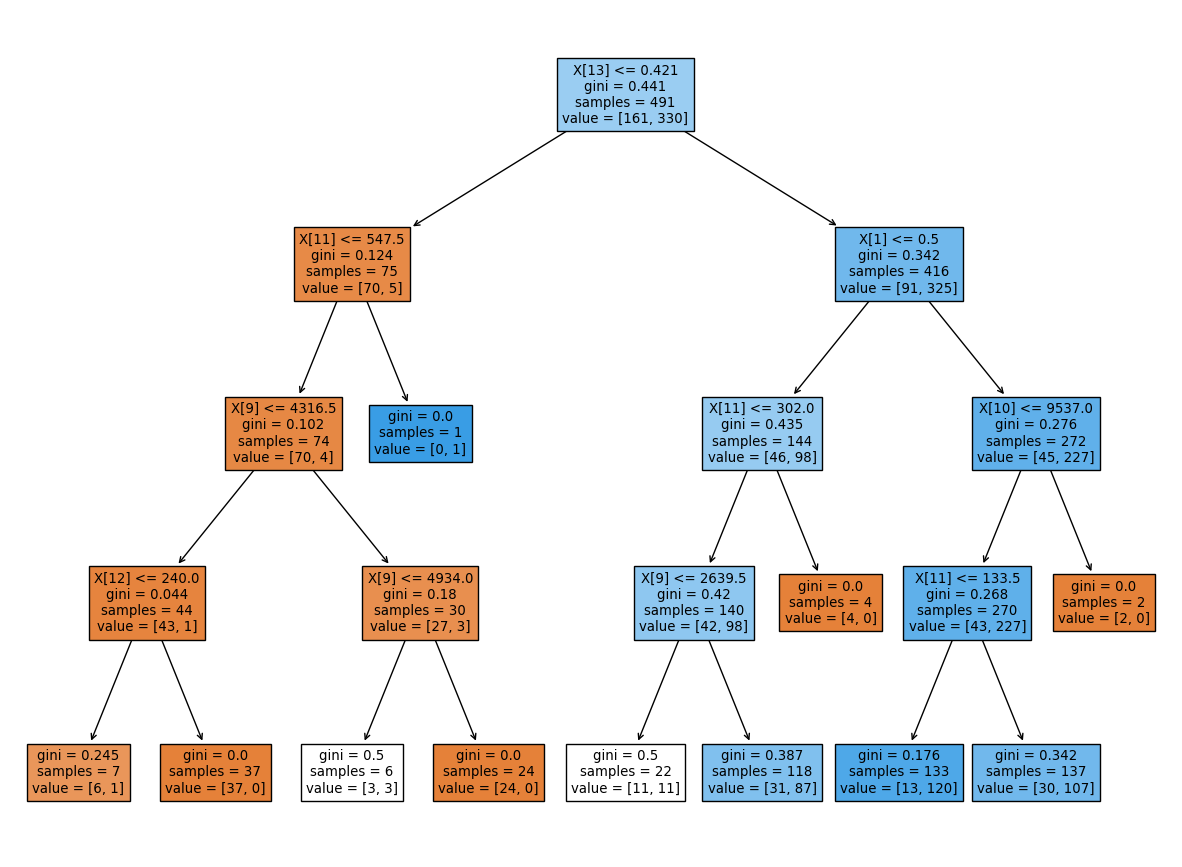

In [40]:
from sklearn import tree
plt.figure(figsize=(15,11) )
tree.plot_tree(tree_model,filled=True)
plt.show()

In [41]:
#Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier

In [42]:
forest_model = RandomForestClassifier(n_estimators = 600)   #Random Forest Model

In [43]:
forest_model.fit(x_train, y_train)        #train model with dataset

RandomForestClassifier(n_estimators=600)

In [44]:
forest_y_pred = forest_model.predict(x_test)

In [45]:
print(classification_report(y_test, forest_y_pred))

              precision    recall  f1-score   support

           0       0.65      0.48      0.56        31
           1       0.84      0.91      0.87        92

    accuracy                           0.80       123
   macro avg       0.75      0.70      0.72       123
weighted avg       0.79      0.80      0.79       123



In [46]:
print(confusion_matrix(y_test, forest_y_pred))

[[15 16]
 [ 8 84]]


In [47]:
forest_accuracy = forest_model.score(x_test, y_test)
print('Random Forest Model Accuracy:', forest_accuracy * 100, '%')

Random Forest Model Accuracy: 80.48780487804879 %


In [48]:
print('Decision Tree Model Accuracy:', decision_accuracy * 100, '%')
print('Random Forest Model Accuracy:', forest_accuracy * 100, '%')

Decision Tree Model Accuracy: 73.98373983739837 %
Random Forest Model Accuracy: 80.48780487804879 %
